#Data Science Intership by Codesoft
#Task 2 : Sales Data Prediction using Python


* Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
* In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python.



#Importing Libraries

In [23]:
#imorting required librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Reading and Analysing file

In [24]:
#uploading dataset file and reading the file
data_file = pd.read_csv("/content/advertising.csv")
data_file

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
#reading top 15 records
data_file.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
#calculating shape of file
data_file.shape

(200, 4)

In [ ]:
#gathering information about the file
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data_file.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


#Visualization

In [ ]:
sns.set()

<Axes: >

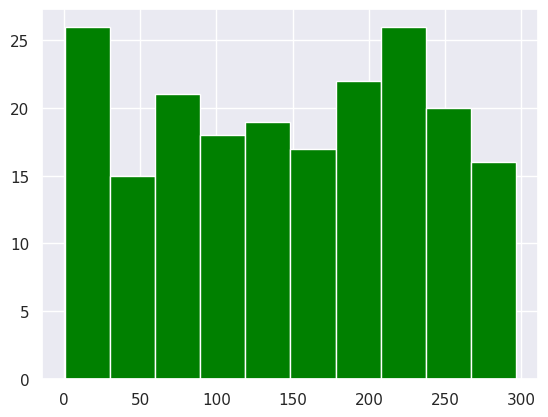

In [ ]:
data_file['TV'].hist(color='green')

<Axes: >

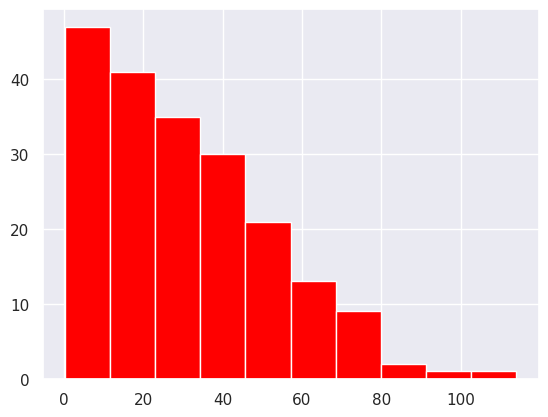

In [ ]:
data_file['Newspaper'].hist(color='red')

<Axes: >

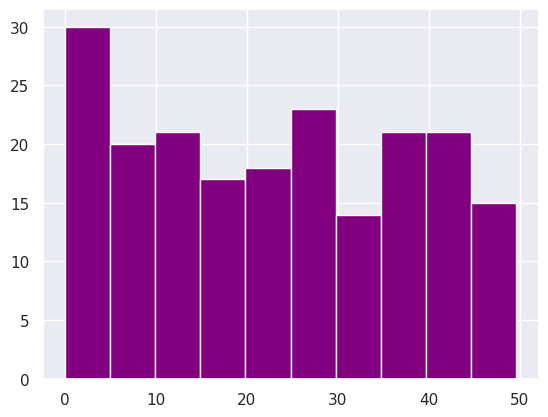

In [ ]:
data_file['Radio'].hist(color='purple')

<Axes: >

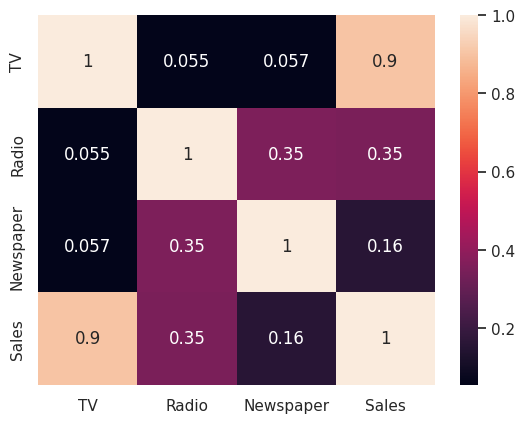

In [ ]:
# correlation among the variables
sns.heatmap(data_file.corr(),annot=True, fmt='.2g')

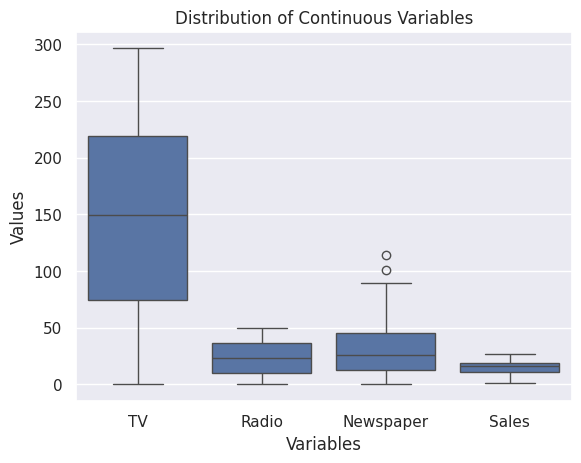

In [ ]:
# distribution among the variables
sns.boxplot(data_file.melt(value_vars=data_file.columns),x = 'variable',y='value')
plt.title("Distribution of Continuous Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

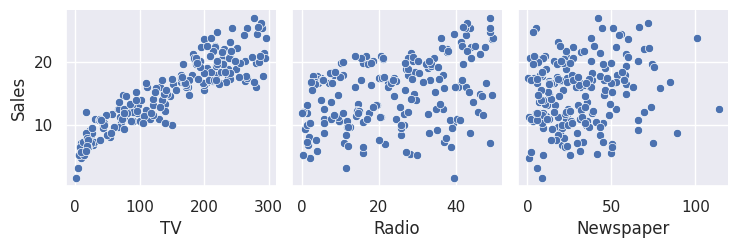

In [ ]:
sns.pairplot(data_file,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind='scatter')

#Dataset Preparation

In [ ]:
#getting the x and y axis
x = data_file.drop(['Sales'],axis=1)
y = data_file['Sales']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(f'''X Train: {x_train.shape}
X Test:{x_test.shape}
y Train:{y_train.shape}
y Test: {y_test.shape}''')

X Train: (160, 3)
X Test:(40, 3)
y Train:(160,)
y Test: (40,)


In [ ]:
#preprocessing
preprocess = Pipeline([
    ('scaler',StandardScaler())
])
#model
model = Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [ ]:
x=data_file.drop(columns='Sales')
y=data_file['Sales']

In [ ]:
#prediction
y_pred = model.predict(x_test)
print(f'Testing Accuracy:{round(100*r2_score(y_test,y_pred),2)}%')

Testing Accuracy:94.29%


In [ ]:
prediction = model.predict(x_test)
prediction

array([13.596, 19.051, 12.239, 15.244,  8.503,  6.926, 19.43 , 17.616,
       11.431, 18.952, 10.129, 17.141, 17.005, 23.373, 20.665,  9.709,
       17.373, 11.814,  9.108, 21.582,  7.216, 18.625, 25.354, 24.837,
       10.979, 16.4  , 19.91 ,  9.958, 17.237,  8.096,  8.409, 19.12 ,
       11.864,  6.298, 16.598, 11.129, 11.513, 12.023,  6.629, 15.851])

In [ ]:
feature_importances = model.named_steps['regressor'].feature_importances_
print(feature_importances)

[0.86329254 0.1241507  0.01255676]


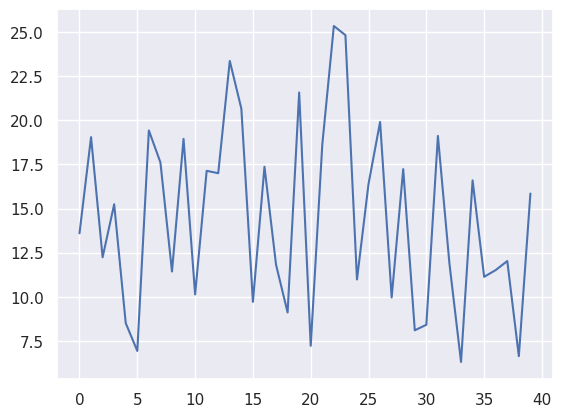

In [ ]:
plt.plot(prediction)